In [2]:
# Upload file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#import libraries
import pandas as pd
import sklearn
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [5]:
# load file
train_file_path = '/content/drive/MyDrive/RAKAMIN INTERN HOME CREDIT/DATA SET_TUGAS AKHIR/application_train.csv'
test_file_path =('/content/drive/MyDrive/RAKAMIN INTERN HOME CREDIT/DATA SET_TUGAS AKHIR/application_test.csv')

In [6]:
# Baca file CSV
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

In [ ]:
print(train_data.head())
print(test_data.head())

In [ ]:
#Explore Data
print(train_data.info())
print(train_data.describe())

In [ ]:
# Tampilkan informasi dataset
print("Informasi Train Data:")
print(train_data.info())

print("\nInformasi Test Data:")
print(test_data.info())

In [23]:
#Data Pre-Processing

#Handling Missing Values
# Menghitung jumlah nilai yang hilang pada setiap kolom
missing_values = train_data.isnull().sum()
print("Missing Value Train Data:")
# Menampilkan kolom-kolom yang memiliki nilai yang hilang
print(missing_values[missing_values > 0])

# Menghitung jumlah nilai yang hilang pada setiap kolom
missing_values = test_data.isnull().sum()
print("\nMissing Value Test Data:")
# Menampilkan kolom-kolom yang memiliki nilai yang hilang
print(missing_values[missing_values > 0])

#Data Cleaning
#Mengisi nilai yang hilang dengan median
train_data.fillna(train_data.median(numeric_only=True), inplace=True)
test_data.fillna(test_data.median(numeric_only=True), inplace=True)

In [ ]:
# Menampilkan beberapa baris pertama dari DataFrame setelah pembersihan
print("Train Data:")
print(train_data.head())

# Menampilkan statistik deskriptif dari DataFrame setelah pembersihan
print("\nSummary Statistics for Train Data:")
print(train_data.describe())


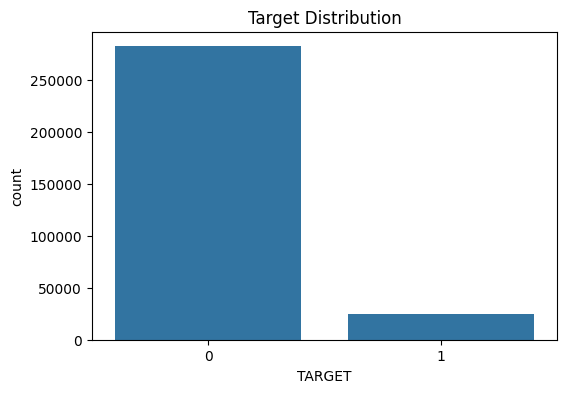

In [35]:
#Data Visualisasi
# Visualisasi distribusi target
plt.figure(figsize=(6, 4))
sns.countplot(x='TARGET', data=train_data)
plt.title('Target Distribution')
plt.show()


In [ ]:
#Feature Engineering

train_data_indexed = train_data.set_index(['SK_ID_CURR', 'TARGET'])
test_data_indexed = test_data.set_index('SK_ID_CURR')


numeric_cols = train_data.select_dtypes(include=['number']).columns
categorical_cols = train_data.select_dtypes(include=['object']).columns

#Memastikan kolom 'TARGET' ada di kedua jenis data (numerik dan kategorikal)
numeric_cols = [col for col in numeric_cols if col in test_data.columns]
categorical_cols = [col for col in categorical_cols if col in test_data.columns]

#Memisahkan kolom numerik dan kategorikal
train_numeric = train_data[numeric_cols]
test_numeric = test_data[numeric_cols]
train_categorical = train_data[categorical_cols]
test_categorical = test_data[categorical_cols]

#Menangani nilai-nilai hilang untuk kolom numerik
numeric_imputer = SimpleImputer(strategy='median')
train_numeric_imputed = pd.DataFrame(numeric_imputer.fit_transform(train_numeric), columns=train_numeric.columns)
test_numeric_imputed = pd.DataFrame(numeric_imputer.transform(test_numeric), columns=test_numeric.columns)

#Menangani nilai-nilai hilang untuk kolom kategorikal
categorical_imputer = SimpleImputer(strategy='most_frequent')
train_categorical_imputed = pd.DataFrame(categorical_imputer.fit_transform(train_categorical), columns=train_categorical.columns)
test_categorical_imputed = pd.DataFrame(categorical_imputer.transform(test_categorical), columns=test_categorical.columns)

#Menggabungkan kembali data yang sudah diimputasi
train_data_imputed = pd.concat([train_numeric_imputed, train_categorical_imputed], axis=1)
test_data_imputed = pd.concat([test_numeric_imputed, test_categorical_imputed], axis=1)

# Mengkode variabel kategorikal
label_encoder = LabelEncoder()
for col in categorical_cols:
    train_data_imputed[col] = label_encoder.fit_transform(train_data_imputed[col])
    test_data_imputed[col] = label_encoder.transform(test_data_imputed[col])

#Mengembalikan kolom 'SK_ID_CURR' dan 'TARGET' sebagai kolom biasa
train_data_imputed['SK_ID_CURR'] = train_data_indexed.index.get_level_values('SK_ID_CURR')
train_data_imputed['TARGET'] = train_data_indexed.index.get_level_values('TARGET')
test_data_imputed['SK_ID_CURR'] = test_data_indexed.index

#Menampilkan informasi setelah pengkodean
print("Informasi setelah pengkodean variabel kategorikal:")
print(train_data_imputed.info())


In [ ]:
#Model Machine Learning
# Pisahkan fitur dan target
X = train_data_imputed.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = train_data_imputed['TARGET']

# Bagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Logistic Regression
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train_scaled, y_train)
y_pred_lr = logistic_regression_model.predict(X_test_scaled)

# Evaluasi model Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy Logistic Regression:", accuracy_lr)
print("Classification Report Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

# Model Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)
y_pred_rf = random_forest_model.predict(X_test_scaled)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nAccuracy Random Forest:", accuracy_rf)
print("Classification Report Random Forest:")
print(classification_report(y_test, y_pred_rf))

In [19]:
#Mencari model terbaik menggunakan hyperparameter

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur dan target
X = train_data_imputed.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = train_data_imputed['TARGET']

# Bagi data menjadi set pelatihan (70%) dan set pengujian (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Tentukan hyperparameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Gunakan GridSearchCV untuk mencari kombinasi hyperparameter terbaik
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Tampilkan kombinasi hyperparameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluasi model dengan hyperparameter terbaik
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

# Evaluasi model terbaik
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy Best Model:", accuracy_best)
print("Classification Report Best Model:")
print(classification_report(y_test, y_pred_best))


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy Best Model: 0.9190742881919353
Classification Report Best Model:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    254359
           1       0.56      0.00      0.00     22401

    accuracy                           0.92    276760
   macro avg       0.74      0.50      0.48    276760
weighted avg       0.89      0.92      0.88    276760



In [21]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

[LightGBM] [Info] Number of positive: 2424, number of negative: 28327
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.094755 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10477
[LightGBM] [Info] Number of data points in the train set: 30751, number of used features: 111
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.078827 -> initscore=-2.458396
[LightGBM] [Info] Start training from score -2.458396


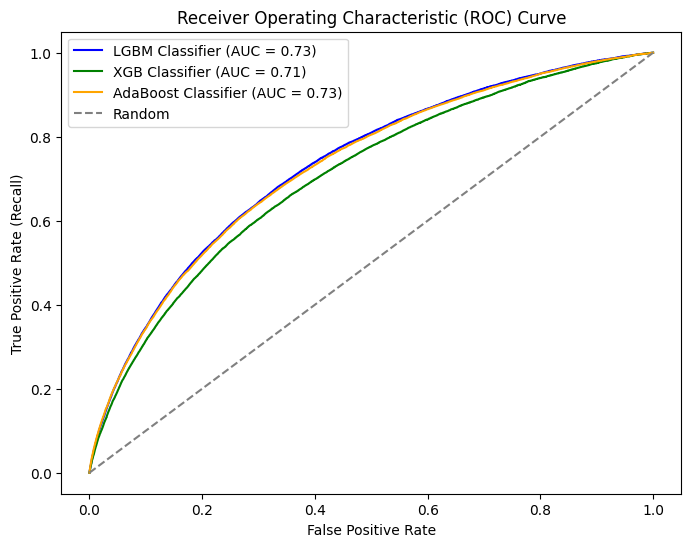

In [46]:
# Visualisasi Model Machine Learning Hyperparameter
# Inisialisasi tiga model
lgbm_model = LGBMClassifier()
xgb_model = XGBClassifier()
ada_model = AdaBoostClassifier()

# Fit model ke data pelatihan
lgbm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)

# Peroleh probabilitas prediksi dari masing-masing model
lgbm_probs = lgbm_model.predict_proba(X_test)[:, 1]
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
ada_probs = ada_model.predict_proba(X_test)[:, 1]

# Hitung nilai False Positive Rate (fpr) dan True Positive Rate (tpr) untuk setiap model
lgbm_fpr, lgbm_tpr, _ = roc_curve(y_test, lgbm_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
ada_fpr, ada_tpr, _ = roc_curve(y_test, ada_probs)

# Hitung Area Under the Curve (AUC) untuk masing-masing model
lgbm_auc = auc(lgbm_fpr, lgbm_tpr)
xgb_auc = auc(xgb_fpr, xgb_tpr)
ada_auc = auc(ada_fpr, ada_tpr)

# Plotting kurva ROC untuk tiga model
plt.figure(figsize=(8, 6))
plt.plot(lgbm_fpr, lgbm_tpr, color='blue', label=f'LGBM Classifier (AUC = {lgbm_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, color='green', label=f'XGB Classifier (AUC = {xgb_auc:.2f})')
plt.plot(ada_fpr, ada_tpr, color='orange', label=f'AdaBoost Classifier (AUC = {ada_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend()
plt.show()

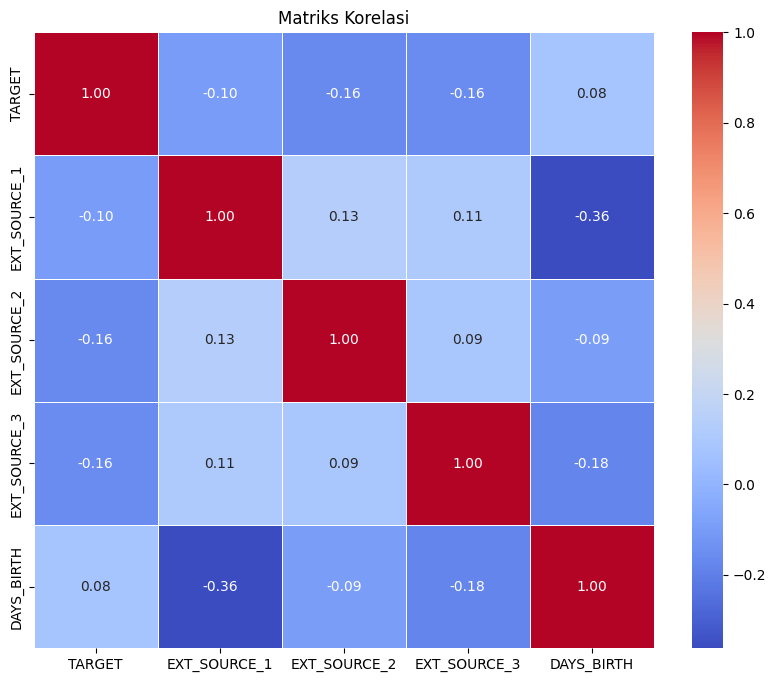

In [40]:
#Data Visualisasi Matriks Korelasi antara Variabel Numerik
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih variabel yang akan digunakan
selected_vars = ['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']

# Buat dataframe yang hanya berisi variabel yang dipilih
selected_data = train_data[selected_vars]

# Hitung korelasi antar variabel
correlation_matrix = selected_data.corr()

# Plot matriks korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriks Korelasi')
plt.show()

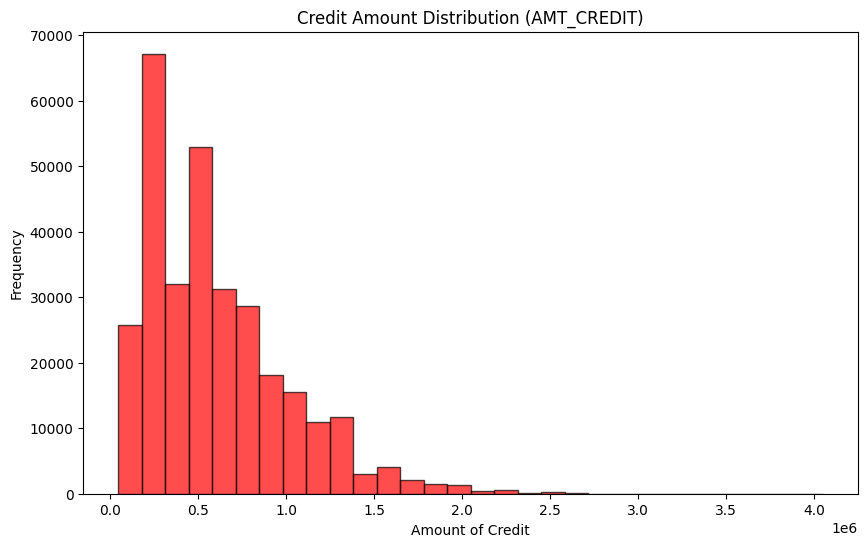

In [36]:
#Business Insigth (Hubungan jumlah kredit terhadap kemampuan membayar)
import matplotlib.pyplot as plt

# Pilih variabel yang akan digunakan
credit_var = 'AMT_CREDIT'

# Plot histogram distribusi AMT_CREDIT
plt.figure(figsize=(10, 6))

plt.hist(train_data[credit_var], bins=30, color='red', edgecolor='black', alpha=0.7)
plt.title('Credit Amount Distribution (AMT_CREDIT)')
plt.xlabel('Amount of Credit')
plt.ylabel('Frequency')

plt.show()





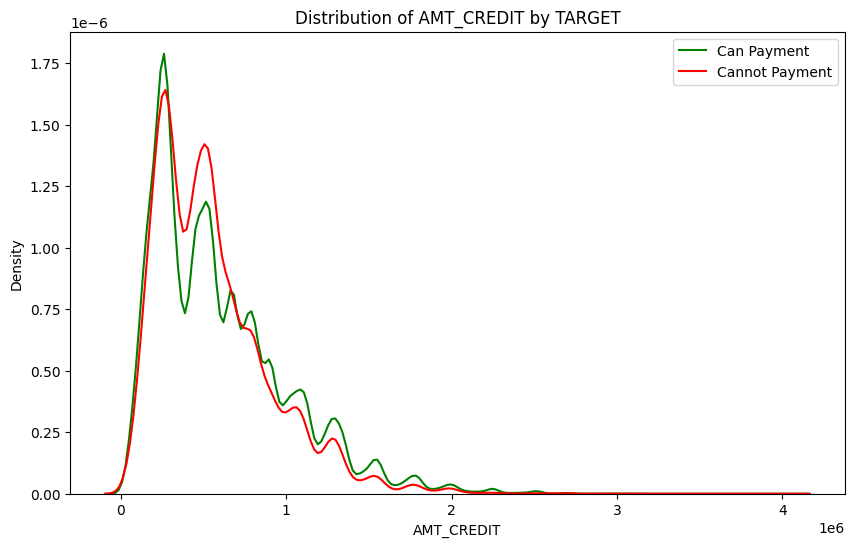

In [38]:
#Business Insigth (Hubungan jumlah kredit terhadap kemampuan membayar)
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih variabel yang akan digunakan
credit_var = 'AMT_CREDIT'
target_var = 'TARGET'

# Buat dataframe yang hanya berisi variabel yang dipilih dan tanpa nilai-nilai yang hilang
credit_data = train_data[[credit_var, target_var]].dropna()

# Plot kurva distribusi AMT_CREDIT berdasarkan TARGET
plt.figure(figsize=(10, 6))

sns.kdeplot(data=credit_data[credit_data[target_var] == 0][credit_var], label='Can Payment', color='green')
sns.kdeplot(data=credit_data[credit_data[target_var] == 1][credit_var], label='Cannot Payment', color='red')

plt.title('Distribution of AMT_CREDIT by TARGET')
plt.xlabel('AMT_CREDIT')
plt.ylabel('Density')
plt.legend()

plt.show()


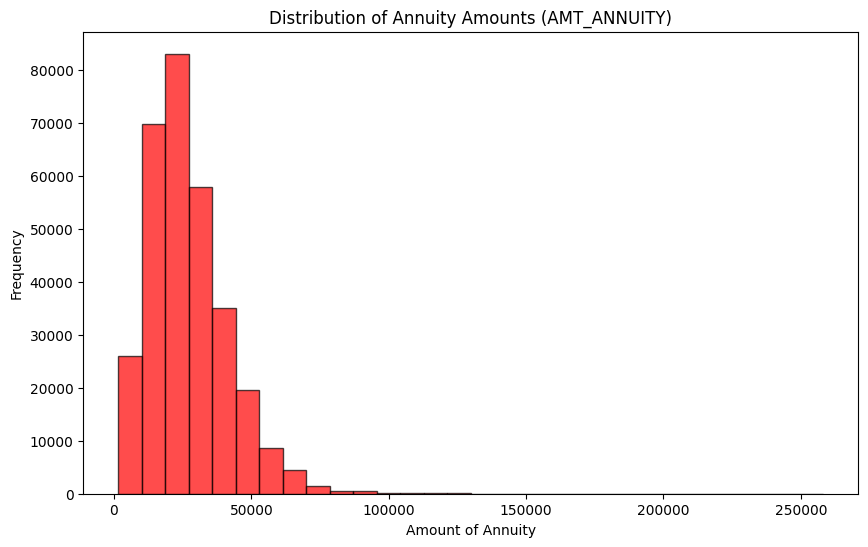

In [42]:
#Business Insight ( Hubungan jumlah anuitas terhadap kemampuan bayar)
import matplotlib.pyplot as plt

# Pilih variabel yang akan digunakan
annuity_var = 'AMT_ANNUITY'

# Plot histogram distribusi AMT_ANNUITY
plt.figure(figsize=(10, 6))

plt.hist(train_data[annuity_var], bins=30, color='red', edgecolor='black', alpha=0.7)
plt.title('Distribution of Annuity Amounts (AMT_ANNUITY)')
plt.xlabel('Amount of Annuity')
plt.ylabel('Frequency')

plt.show()


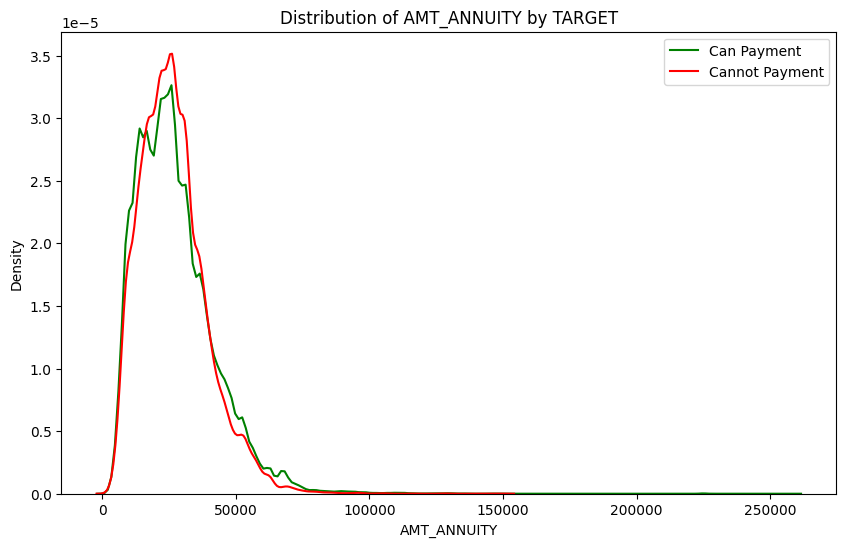

In [43]:
#Business Insight ( Hubungan jumlah anuitas terhadap kemampuan bayar)

import matplotlib.pyplot as plt
import seaborn as sns

# Pilih variabel yang akan digunakan
annuity_var = 'AMT_ANNUITY'
target_var = 'TARGET'

# Buat dataframe yang hanya berisi variabel yang dipilih dan tanpa nilai-nilai yang hilang
annuity_data = train_data[[annuity_var, target_var]].dropna()

# Plot kurva distribusi AMT_ANNUITY berdasarkan TARGET
plt.figure(figsize=(10, 6))

sns.kdeplot(data=annuity_data[annuity_data[target_var] == 0][annuity_var], label='Can Payment', color='green')
sns.kdeplot(data=annuity_data[annuity_data[target_var] == 1][annuity_var], label='Cannot Payment', color='red')

plt.title('Distribution of AMT_ANNUITY by TARGET')
plt.xlabel('AMT_ANNUITY')
plt.ylabel('Density')
plt.legend()

plt.show()
